# <center> 🚢 Titanic Dataset Visualization 📈 </center>
---

<center>
<img src="https://images.squarespace-cdn.com/content/v1/5006453fe4b09ef2252ba068/1351392437993-BV9HK0L2V72X9FA05IOP/ke17ZwdGBToddI8pDm48kNWCohGJSet_CTOduKgSq_IUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKcq9E8CIbGv7FsN6c8xqWQM05n26OV6V51zLkOg8VQq3jPVEm2DFIE48zJj5Gl4vDf/Titanic_Blueprints_Design+%2815%29.gif" alt="Titanic Blueprint"
style="width: 100%; height: auto;" > </center>

---

Welcome aboard! ⚓  
This notebook dives into the **Titanic dataset** to uncover insights and visualize key aspects of the passengers' demographics, survival rates, and more.

### Objectives:
- Explore the dataset through intuitive visualizations.
- Understand survival trends by class, gender, and age.
- Experiment with advanced plotting techniques using Matplotlib and Seaborn.

Let's set sail on this data-driven journey! 🌊

---

# Dataset Download

In [1]:
!pip install --quiet kaggle
! kaggle competitions download -c titanic

401 - Unauthorized - Unauthenticated


In [2]:
import zipfile
import os

# Path to the zip file
zip_file_path = "titanic.zip"

# Create a folder for extraction
extract_to_folder = "dataset"
os.makedirs(extract_to_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

print(f"Files have been extracted to: {extract_to_folder}")

Files have been extracted to: dataset


# Imports

In [3]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Data Handling and Analysis
import numpy as np
import pandas as pd

plt.rcParams['figure.dpi'] = 100

In [4]:
data = pd.read_csv("dataset/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pre Processing

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.shape

(891, 12)

In [7]:
null_percentage = data.isnull().mean() * 100
high_null_columns = null_percentage[null_percentage >= 75].index
high_null_columns_info = null_percentage[null_percentage >= 75]
print("Columns with 75% or more null values:")
print(high_null_columns_info)

Columns with 75% or more null values:
Cabin    77.104377
dtype: float64


In [8]:
data.drop(columns="Cabin", inplace=True)

In [9]:
missing_data = pd.DataFrame(data.isna().sum()).reset_index()
missing_data.columns = ['Column Name', 'Missing Values']
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)

   Column Name  Missing Values
5          Age             177
10    Embarked               2


Filling Age Null values with Median

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].median())

Filling Cabin and Embarked values with "Unknown"

In [11]:
data['Embarked'] = data['Embarked'].fillna("Unknown")

In [12]:
missing_data = pd.DataFrame(data.isna().sum()).reset_index()
missing_data.columns = ['Column', 'Missing Values']
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)

Empty DataFrame
Columns: [Column, Missing Values]
Index: []


In [13]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


No Duplicates !

In [14]:
data['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [173]:
def count_plot_percentage(data, column, colors, ax, title="Count Plot with Percentages"):
    sns.countplot(data=data, x=column, ax=ax, hue=column, palette=colors)
    ax.set_title(f'{title}', fontsize=14, fontweight='bold')
    ax.set_xlabel(f'{column}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12)

    total_count = len(data)
    # Annotate bar heights
    for bar in ax.patches:
        bar_height = bar.get_height()
        if bar_height > 0:
            percentage = (bar_height / total_count) * 100
            ax.text(
                bar.get_x() + bar.get_width() / 2, bar_height - 5, f"{percentage:.1f}%",  
                ha='center', va='top', fontsize=10, color='white', fontweight='bold'
            )

    plt.tight_layout()
    return ax

def count_plot(data, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5), sharey=True)
    
    if num_cols == 1:
        axes = [axes]  
    
    for i, column in enumerate(columns):
        sns.countplot(data=data, x=column, ax=axes[i], hue=column, palette='Set2', legend=True)
        axes[i].set_title(f'{column} Counts',fontsize=12, fontweight='bold')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count' if i == 0 else '') 
        
        for bar in axes[i].patches:
            bar_height = bar.get_height()
            if bar_height > 0:  
                axes[i].text(
                    bar.get_x() + bar.get_width() / 2, bar_height - 15, str(int(bar_height)),  
                    ha='center', va='top', fontsize=10, color='lightgray', fontweight='bold'
                )
    
    plt.tight_layout()
    plt.show()

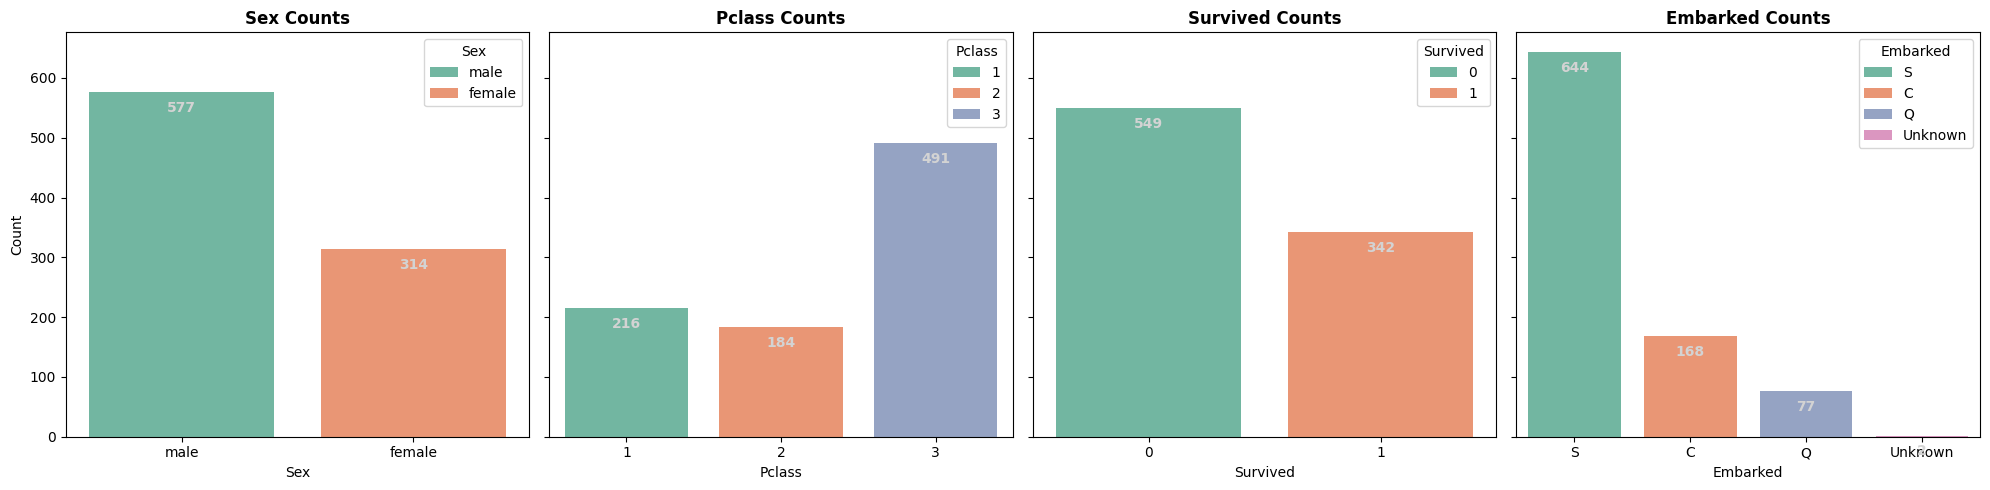

In [174]:
cat_cols = ['Sex', 'Pclass', 'Survived', 'Embarked']
count_plot(data, cat_cols)

We can see that total of **591** people travelled in **TITANIC**, Out of which only **342** people *Survived*. <br>
0 = Drowned <br>
1 = Survived <br>


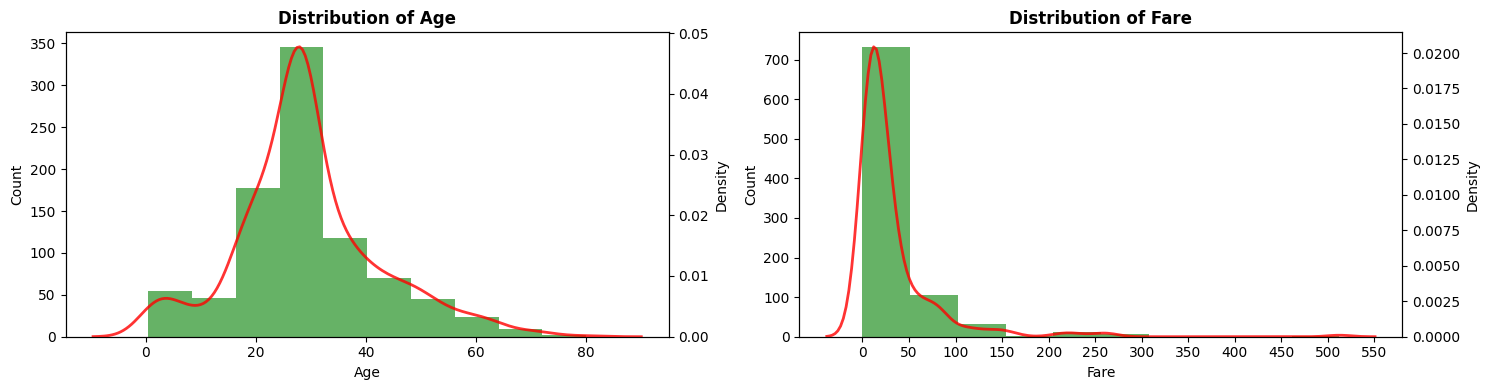

In [172]:
num_cols = ['Age', 'Fare']

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

for i, column in enumerate(num_cols):
    ax = axes[i]
    ax2 = ax.twinx()  

    sns.histplot(data[column], ax=ax, bins=10, kde=False, color='g', alpha=0.6, stat='count', edgecolor='none')
    ax.set_title(f'Distribution of {column}', fontsize=12, fontweight='bold')

    sns.kdeplot(data[column], ax=ax2, linewidth=2, color='r', alpha=0.8, label='KDE', legend=False)
    if column == 'Fare':
        ax.set_xticks(range(0, int(data['Fare'].max()) + 50, 50))  


plt.tight_layout()
plt.show()

From above distributions, we can able to see that,<br> 
- **20 - 30 Age Group** people are more in number.
- **0 - 50 Fare Range** has been bought most.

In [18]:

data_copy = data.copy()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

data_copy['AgeGroup'] = pd.cut(data_copy['Age'], bins=bins, labels=labels, right=False)

age_counts = data_copy['AgeGroup'].value_counts().sort_index()
age_counts


AgeGroup
0-10      62
10-20    102
20-30    397
30-40    167
40-50     89
50-60     48
60-70     19
70-80      6
80-90      1
Name: count, dtype: int64

- 397 people falls under 20-30 Age Group.

In [19]:
bins = [0, 50, 100, 200, 300, 400, 500]
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500']

data_copy['FareGroup'] = pd.cut(data_copy['Fare'], bins=bins, labels=labels, right=False)

fare_counts = data_copy['FareGroup'].value_counts().sort_index()
fare_counts


FareGroup
0-50       730
50-100     108
100-200     33
200-300     17
300-400      0
400-500      0
Name: count, dtype: int64

- 730 People bought ticket Fare between 0-50.

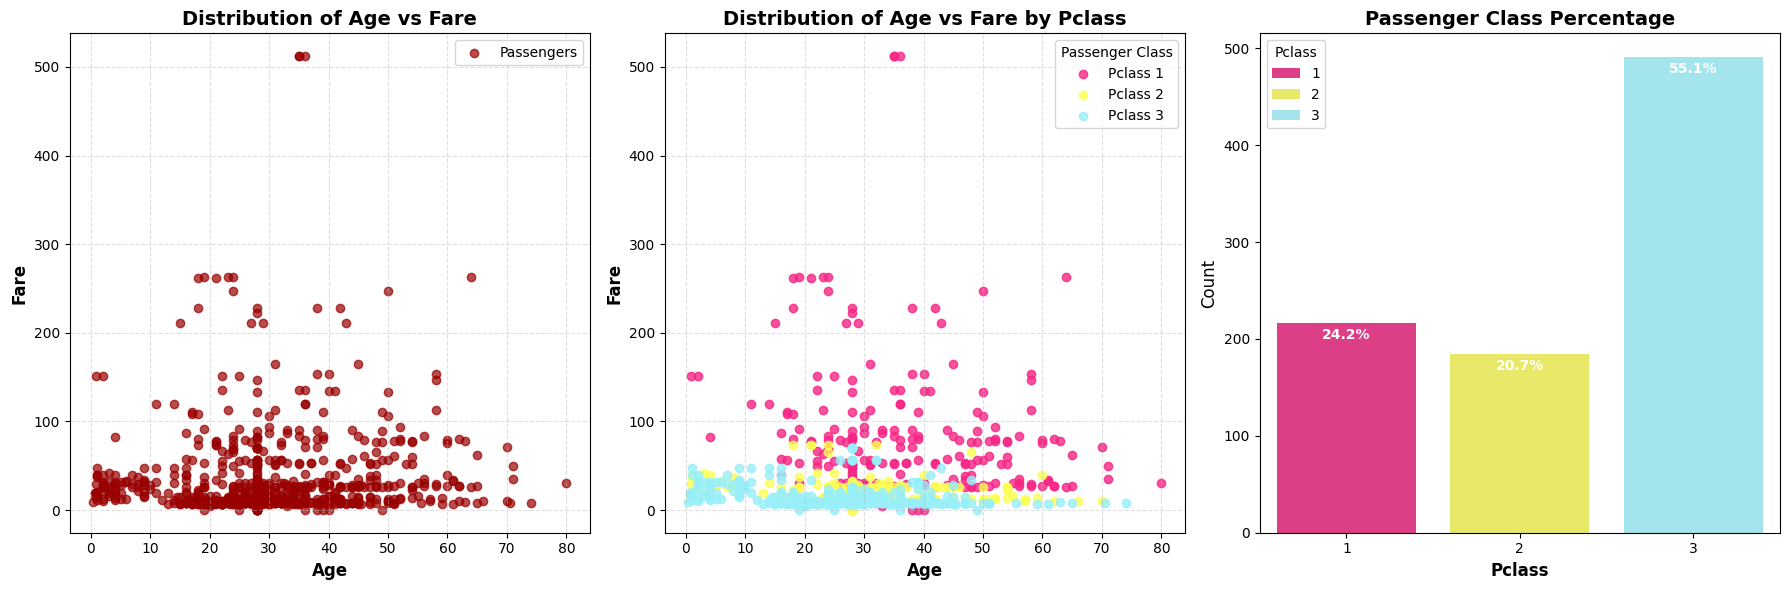

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Scatter plot of Age vs Fare
axes[0].scatter(data['Age'], data['Fare'], c='#990000', alpha=0.7, label='Passengers')
axes[0].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Fare', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Age vs Fare', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.4)

# Subplot 2: Scatter plot of Age vs Fare by Pclass
classes = sorted(data['Pclass'].unique())
colors = ["#F72585", "#fdff52", "#98eff9"] 

for cls, color in zip(classes, colors):
    subset = data[data['Pclass'] == cls]
    axes[1].scatter(subset['Age'], subset['Fare'], alpha=0.8, color=color, label=f'Pclass {cls}')

axes[1].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Fare', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Age vs Fare by Pclass', fontsize=14, fontweight='bold')
axes[1].legend(title='Passenger Class')
axes[1].grid(True, linestyle='--', alpha=0.4)

# Subplot 3: Count plot of Pclass
count_plot_percentage(data=data, column='Pclass', colors=colors, ax=axes[2], title='Passenger Class Percentage')

fig.tight_layout()
plt.show()


In [21]:
data['Survived'] = pd.to_numeric(data['Survived'], errors='coerce')

# Group by 'Sex' and calculate the mean for 'Survived'
survival_rate = data.groupby(['Sex'])['Survived'].mean()

# Extract male and female survival rates
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']

# Display the result
print(survival_rate)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [22]:
male_pos = np.random.uniform(0, male_rate, len(data[(data['Sex']=='male') & (data['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(data[(data['Sex']=='male') & (data['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(data[(data['Sex']=='female') & (data['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(data[(data['Sex']=='female') & (data['Survived']==0)]))

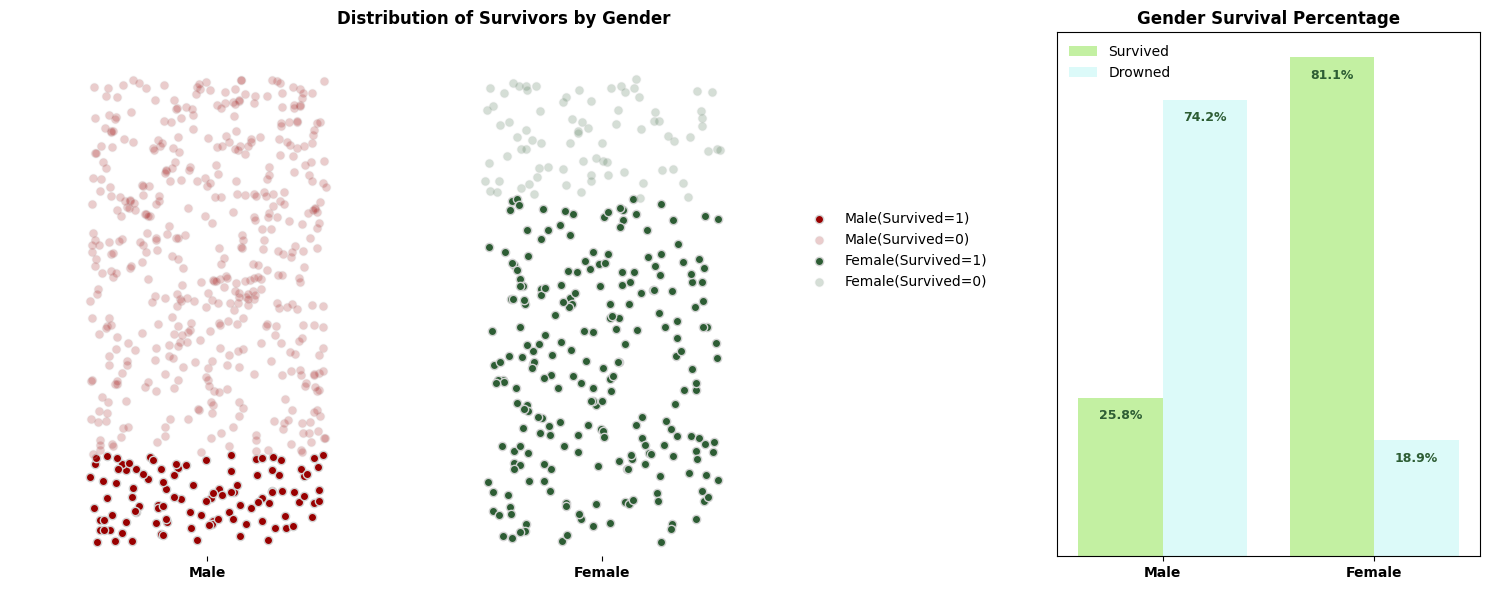

In [55]:
gs = GridSpec(1, 2, width_ratios=[7, 3])

# Define the axes
fig = plt.figure(figsize=(15, 6))

# Define the axes
ax0 = fig.add_subplot(gs[0])  # Left plot
ax1 = fig.add_subplot(gs[1]) 
np.random.seed(42)

# Male Stripplot
ax0.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#990000', edgecolor='lightgray', label='Male(Survived=1)')
ax0.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax0.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#2d5d34', edgecolor='lightgray', label='Female(Survived=1)')
ax0.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#2d5d34', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax0.set_xlim(-0.5, 2.0)
ax0.set_ylim(-0.03, 1.1)

# Ticks
ax0.set_xticks([0, 1])
ax0.set_xticklabels(['Male', 'Female'], fontweight='bold', fontsize=10)
ax0.set_yticks([], minor=False)
ax0.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax0.spines[s].set_visible(False)


# Title & Explanation
ax0.set_title('Distribution of Survivors by Gender', fontweight='bold', fontsize=12, ha='center')      

ax0.legend(loc=(0.8, 0.5), edgecolor='None')


# Count plot
colors = ['#c1fd95', '#d7fffe']
gender_survival = data_copy.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
gender_survival['Percentage'] = gender_survival.groupby('Sex')['Count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(
    data=gender_survival,
    x='Sex',
    y='Percentage',
    hue='Survived',
    palette=colors,
    ax=ax1
)

# Format the bar plot
ax1.set_title('Gender Survival Percentage', fontsize=12, fontweight='bold')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Male', 'Female'], fontweight='bold', fontsize=10)
ax1.set_ylabel('', fontsize=12)
ax1.set_yticks([])
ax1.set_xlabel('', fontsize=12)
ax1.legend(title='Survived', loc='upper right', frameon=False)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Survived', 'Drowned'], loc='upper left', frameon=False)


# Annotate percentages on bars
for bar in ax1.patches:
    bar_height = bar.get_height()
    if bar_height > 0:
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height - 4,
            f'{bar_height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9,
            color='#2d5d34',
            fontweight='bold'
        )
plt.tight_layout()
plt.show()

Female has higher survival rate of 81.1% compared to males with 25.8% survival rate. The survival rate of females is higher than Male

In [24]:
Pclass_survival = data_copy.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')
Pclass_survival['Percentage'] = Pclass_survival.groupby('Pclass')['Count'].transform(lambda x: x / x.sum() * 100)
Pclass_survival

,Pclass,Survived,Count,Percentage
0,1,0,80,37.037037
1,1,1,136,62.962963
2,2,0,97,52.717391
3,2,1,87,47.282609
4,3,0,372,75.763747
5,3,1,119,24.236253


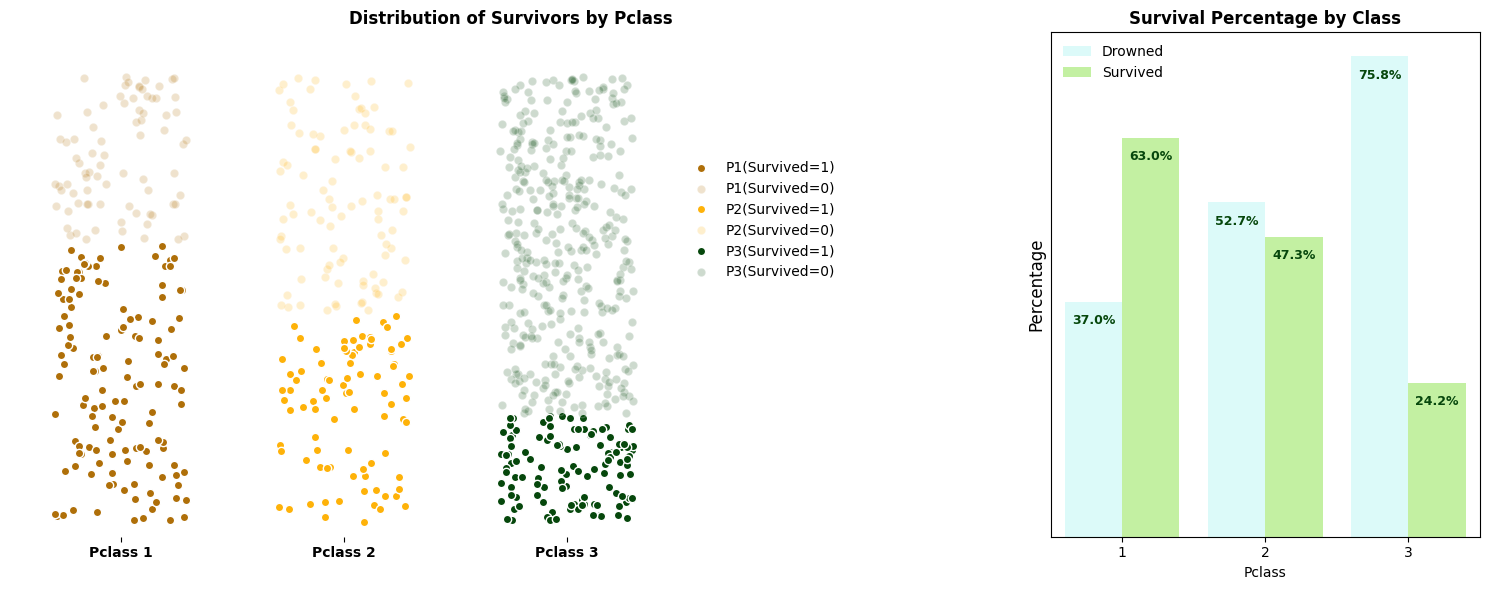

In [56]:
# You can also make this meta data using for-loop
survival_rate = data.groupby(['Pclass'])['Survived'].mean()
p1_rate = survival_rate.loc[1]
p2_rate = survival_rate.loc[2]
p3_rate = survival_rate.loc[3]

p1_pos = np.random.uniform(0, p1_rate, len(data[(data['Pclass']==1) & (data['Survived']==1)]))
p1_neg = np.random.uniform(p1_rate, 1, len(data[(data['Pclass']==1) & (data['Survived']==0)]))
p2_pos = np.random.uniform(0, p2_rate, len(data[(data['Pclass']==2) & (data['Survived']==1)]))
p2_neg = np.random.uniform(p2_rate, 1, len(data[(data['Pclass']==2) & (data['Survived']==0)]))
p3_pos = np.random.uniform(0, p3_rate, len(data[(data['Pclass']==3) & (data['Survived']==1)]))
p3_neg = np.random.uniform(p3_rate, 1, len(data[(data['Pclass']==3) & (data['Survived']==0)]))



gs = GridSpec(1, 2, width_ratios=[7, 3])
# Define the axes
fig = plt.figure(figsize=(15, 6))
colors = ['#d7fffe', '#c1fd95']
# Define the axes
ax0 = fig.add_subplot(gs[0])  # Left plot
ax1 = fig.add_subplot(gs[1]) 

np.random.seed(42)
["#F72585", "#fdff52", "#98eff9"]
ax0.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), p1_pos, color='#af6f09', edgecolor='white', label='P1(Survived=1)')
ax0.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), p1_neg, color='#af6f09', edgecolor='white', alpha=0.2, label='P1(Survived=0)')
ax0.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), p2_pos, color='#feb209', edgecolor='white', label='P2(Survived=1)')
ax0.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), p2_neg, color='#feb209', edgecolor='white', alpha=0.2, label='P2(Survived=0)')
ax0.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), p3_pos, color='#06470c', edgecolor='white', label='P3(Survived=1)')
ax0.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), p3_neg, color='#06470c', edgecolor='white', alpha=0.2, label='P3(Survived=0)')



# # Set Figure & Axes
ax0.set_xlim(-0.5, 4.0)
ax0.set_ylim(-0.03, 1.1)

# # Ticks
ax0.set_xticks([0, 1, 2])
ax0.set_xticklabels(['Pclass 1', 'Pclass 2', 'Pclass 3'], fontweight='bold', fontsize=10)
ax0.set_yticks([], minor=False)
ax0.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax0.spines[s].set_visible(False)
ax0.set_title('Distribution of Survivors by Pclass', fontweight='bold', fontsize=12, ha='center')

# Title & Explanation
# fig.text(0.06, 0.95, 'Distribution of Survivors by Pclass', fontweight='bold', fontsize=12, ha='left')    


ax0.legend(loc=(0.67, 0.5), edgecolor='None')


sns.barplot(
    data=Pclass_survival,
    x='Pclass',
    y='Percentage',
    hue='Survived',
    palette=colors,
    ax=ax1
)

# Format the bar plot
ax1.set_title('Survival Percentage by Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('Percentage', fontsize=12)
ax1.set_yticks([])
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Drowned', 'Survived'], loc='upper left', frameon=False)

# Annotate percentages on bars
for bar in ax1.patches:
    bar_height = bar.get_height()
    if bar_height > 0:
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height - 4,
            f'{bar_height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9,
            color='#06470c',
            fontweight='bold'
        )
plt.tight_layout()
plt.show()


Passenger Class 1 has the highest survival rate of 63%, followed by Passenger Class 2 with a survival rate of 47% and Passenger Class 3 with a survival rate of 24%.

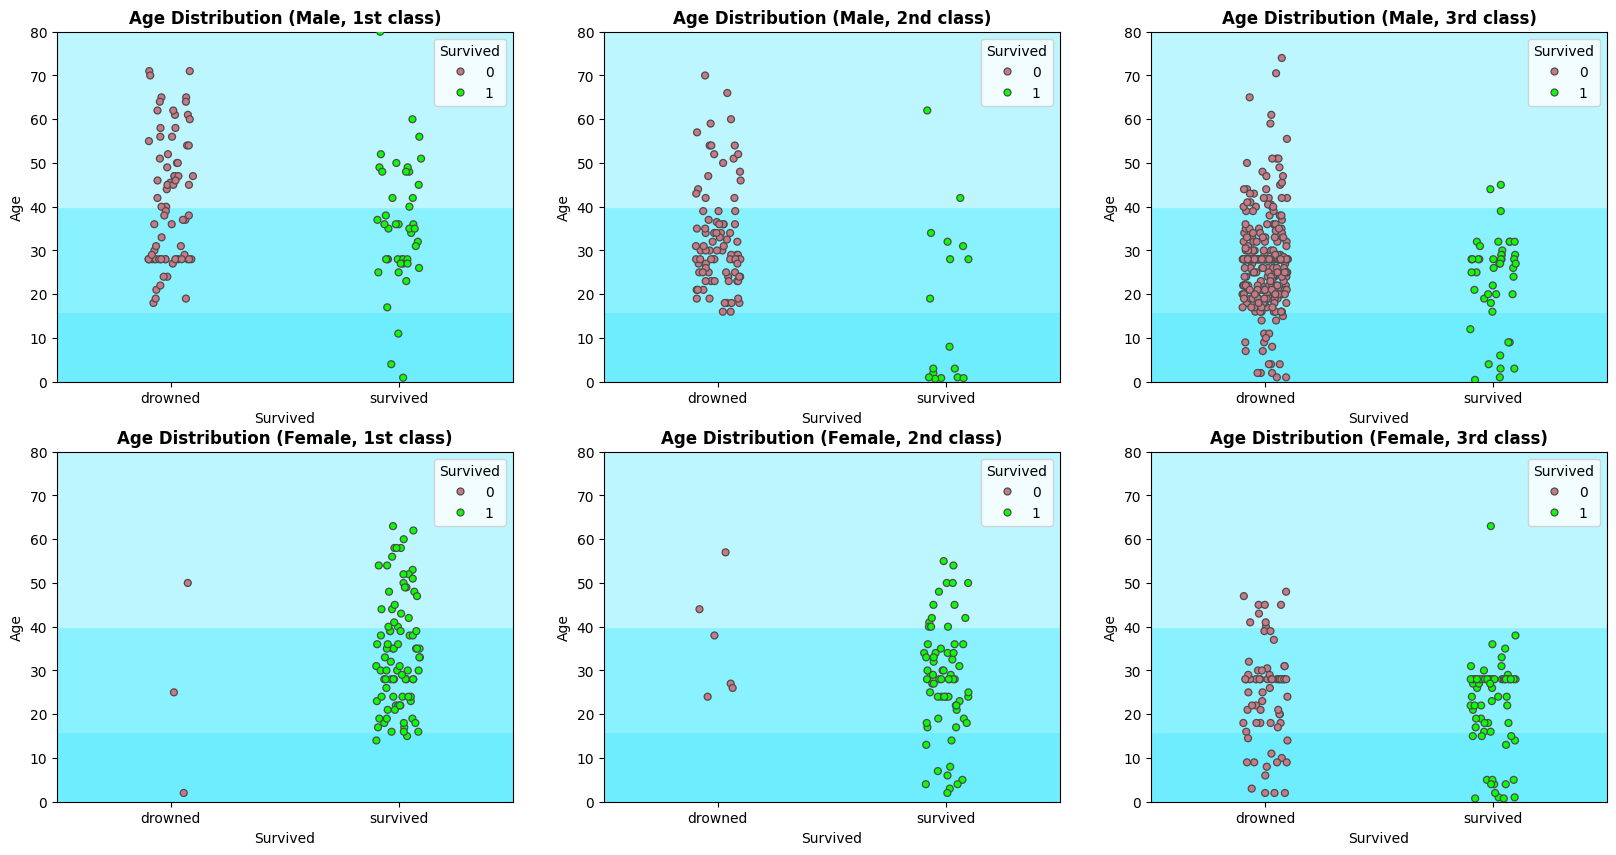

In [26]:
age_1_class = data[(data["Age"] > 0) & 
                              (data["Pclass"] == 1)]
age_2_class = data[(data["Age"] > 0) & 
                              (data["Pclass"] == 2)]
age_3_class = data[(data["Age"] > 0) & 
                              (data["Pclass"] == 3)]

plt.figure(figsize=(20, 10))
palette=["#c77986", "#0aff02"]

plt.subplot(2, 3, 1)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='male'],
     linewidth = 0.9, palette = palette, hue='Survived')
plt.axhspan(0, 16, color = "#6dedfd")
plt.axhspan(16, 40, color = "#8af1fe")
plt.axhspan(40, 80, color = "#bdf6fe")
plt.title('Age Distribution (Male, 1st class)',fontsize= 12, fontweight='bold')
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='male'],
     linewidth = 0.9, palette = palette, hue='Survived')
plt.axhspan(0, 16, color = "#6dedfd")
plt.axhspan(16, 40, color = "#8af1fe")
plt.axhspan(40, 80, color = "#bdf6fe")
plt.title('Age Distribution (Male, 2nd class)',fontsize= 12, fontweight='bold')
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 3)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='male'],
              linewidth = 0.9, palette = palette, hue='Survived')
plt.axhspan(0, 16, color = "#6dedfd")
plt.axhspan(16, 40, color = "#8af1fe")
plt.axhspan(40, 80, color = "#bdf6fe")
plt.title('Age Distribution (Male, 3rd class)',fontsize= 12, fontweight='bold')
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='female'],
     linewidth = 0.9, palette = palette, hue='Survived')
plt.axhspan(0, 16, color = "#6dedfd")
plt.axhspan(16, 40, color = "#8af1fe")
plt.axhspan(40, 80, color = "#bdf6fe")
plt.title('Age Distribution (Female, 1st class)',fontsize= 12, fontweight='bold')
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='female'],
     linewidth = 0.9, palette = palette, hue='Survived')
plt.axhspan(0, 16, color = "#6dedfd")
plt.axhspan(16, 40, color = "#8af1fe")
plt.axhspan(40, 80, color = "#bdf6fe")
plt.title('Age Distribution (Female, 2nd class)',fontsize= 12, fontweight='bold')
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='female'],
              linewidth = 0.9, palette = palette, hue='Survived')
plt.axhspan(0, 16, color = "#6dedfd")
plt.axhspan(16, 40, color = "#8af1fe")
plt.axhspan(40, 80, color = "#bdf6fe")
plt.title('Age Distribution (Female, 3rd class)',fontsize= 12, fontweight='bold')
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.show()

In [27]:
numeric_features = data.select_dtypes(include=np.number)
corr = numeric_features.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


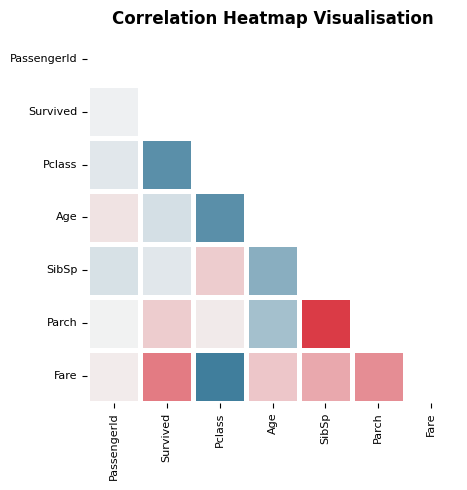

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(230, 10, as_cmap=True)

sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4, 
            cmap=cmap, 
            cbar=False, 
            ax=ax)

ax.set_yticklabels(ax.get_xticklabels(), rotation = 0, fontsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
ax.set_title("Correlation Heatmap Visualisation", fontweight='bold')


plt.tight_layout()
plt.show()

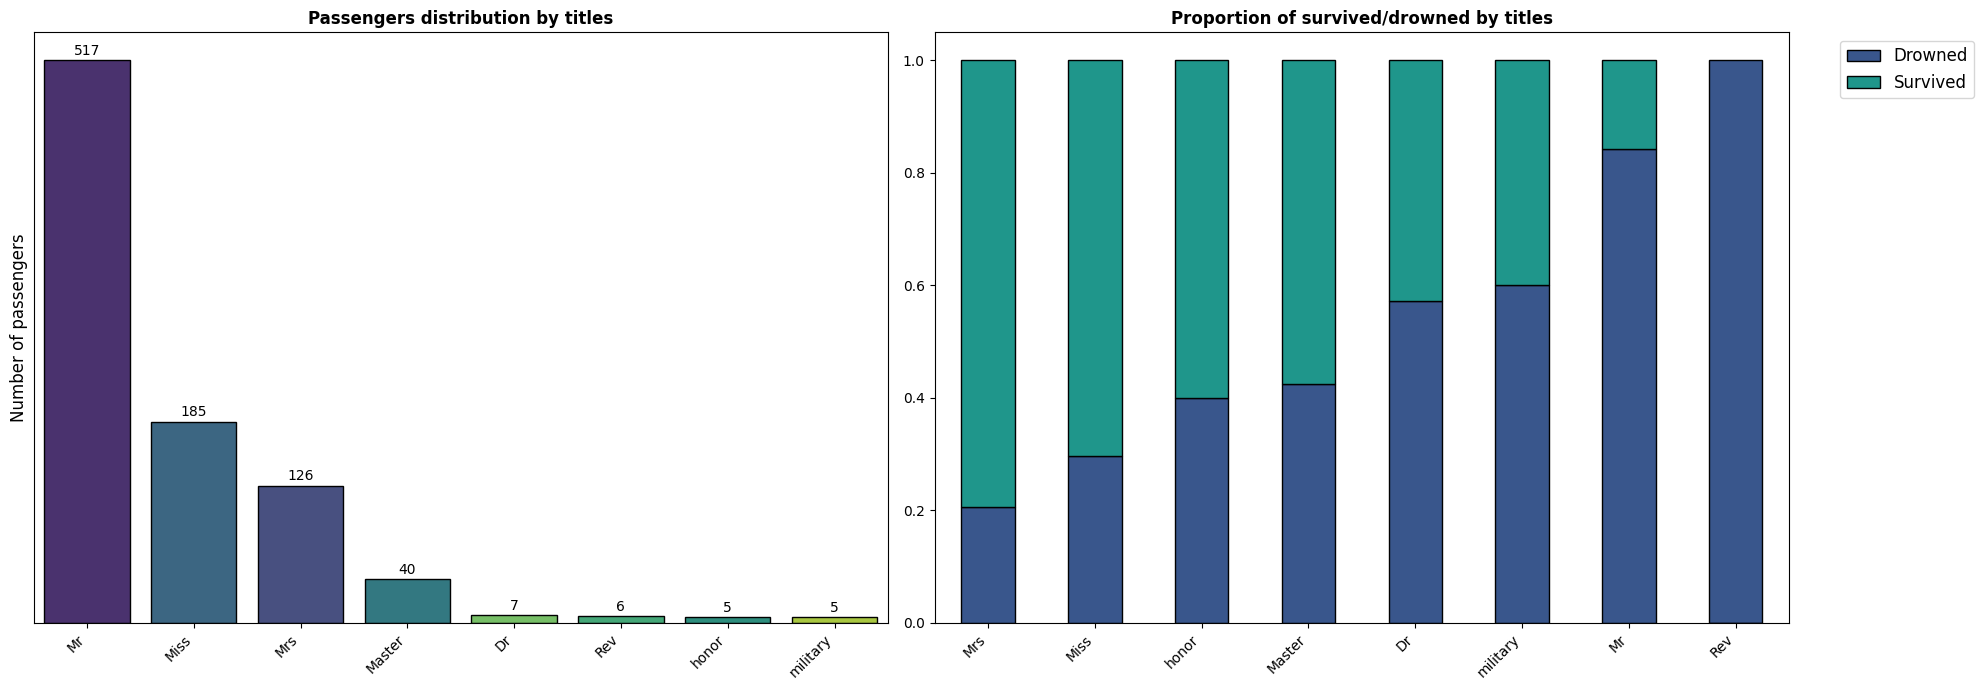

In [95]:
data['Title'] = data['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')

title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',
              
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',

                'Capt':   'military',
                'Col':    'military',
                'Major':  'military',

                'Dr':     'Dr',
                'Rev':    'Rev',
                  
                'Sir':    'honor',
                'the Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
                'Don':    'honor',
                'Dona':   'honor' }

# map titles to category
data['Title_category'] = data['Title'].map(title_dict)


fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(121)
ax = sns.countplot(x = 'Title_category', 
                   data = data, palette = "viridis", hue='Title_category', edgecolor='black',
                   order = data['Title_category'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Passengers distribution by titles',fontsize= 14, fontweight='bold')
plt.ylabel('Number of passengers', fontsize=12)
plt.xlabel('')
plt.yticks([])

# calculate passengers for each category
labels = (data['Title_category'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+5, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()

ax2 = fig.add_subplot(122)
surv_by_title_cat = data.groupby('Title_category')['Survived'].value_counts(normalize = True).unstack()
surv_by_title_cat = surv_by_title_cat.sort_values(by=1, ascending = False)
surv_by_title_cat.plot(kind='bar', 
                       stacked='True', 
                       color=["#39568cff", "#1f968bff"], ax = ax2, edgecolor='black')

plt.legend( ( 'Drowned', 'Survived'), bbox_to_anchor=(1.05, 1), fontsize=12)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)


plt.title('Proportion of survived/drowned by titles',fontsize= 14, fontweight='bold')
plt.xlabel('')
plt.tight_layout()
plt.show()


In [57]:
data['Family_size'] = data['SibSp'] + data['Parch'] + 1
family_size = data['Family_size'].value_counts()
print('Family size and number of passengers:')
print(family_size)

Family size and number of passengers:
Family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64


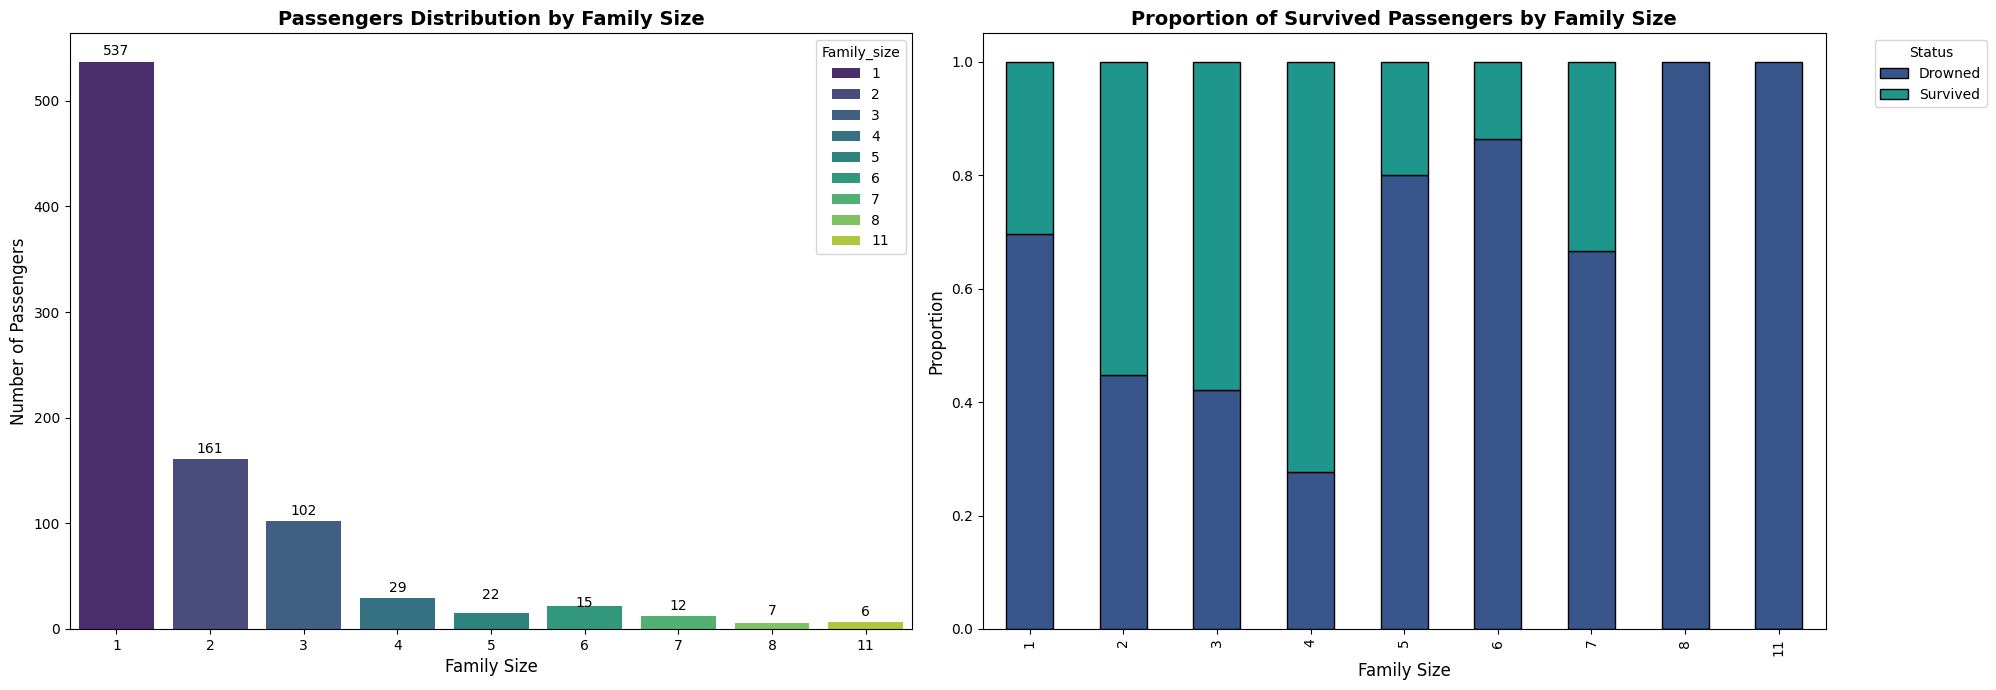

In [93]:
fig = plt.figure(figsize=(20, 7))

# Plot 1: Count Plot for Family Size
ax1 = fig.add_subplot(121)
palette = sns.color_palette("viridis", n_colors=len(data['Family_size'].unique()))
ax = sns.countplot(data=data, x='Family_size', ax=ax1, hue='Family_size',palette=palette)

# Add counts on top of bars
labels = data['Family_size'].value_counts()
for i, v in enumerate(labels):
    ax.text(i, v + 6, str(v), ha='center', size=10, color='black')

ax.set_title('Passengers Distribution by Family Size', fontsize=14,  fontweight='bold')
ax.set_ylabel('Number of Passengers', fontsize=12)
ax.set_xlabel('Family Size', fontsize=12)

# Plot 2: Proportion of Survival by Family Size
ax2 = fig.add_subplot(122)
d = data.groupby('Family_size')['Survived'].value_counts(normalize=True).unstack()
d.plot(
    kind='bar',
    stacked=True,
    color=["#39568cff", "#1f968bff"],
    ax=ax2,
    edgecolor='black'
)

ax2.set_title('Proportion of Survived Passengers by Family Size', fontsize=14, fontweight='bold')
ax2.set_ylabel('Proportion', fontsize=12)
ax2.set_xlabel('Family Size', fontsize=12)
ax2.legend(['Drowned', 'Survived'], bbox_to_anchor=(1.05, 1), loc='upper left', title='Status')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [97]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [96]:
data['Fare'].quantile([0.25, 0.5, 0.75, 0.9])

0.25     7.9104
0.50    14.4542
0.75    31.0000
0.90    77.9583
Name: Fare, dtype: float64

- Mean: The mean fare is approximately 32, indicating most fares are low to moderate.

- Standard Deviation: High standard deviation (49.69) suggests a wide range of fares, with significant variation due to first-class passengers and potential outliers.

- 25th percentile (Q1): 7.91 (lower fares, likely third-class passengers).
- 50th percentile (Median): 14.45 (still in the lower range).
- 75th percentile (Q3): 31.00 (moderate fares, including second-class and some first-class).
- 90th percentile: 77.96 (indicates that most fares are below this).

In [121]:
def categorize_fare(fare):
    if fare < 15:
        return 'Low'
    elif fare < 50:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization
data['Fare_Category'] = data['Fare'].apply(categorize_fare)
fare_survival = data.groupby(['Fare_Category', 'Survived']).size().unstack()
fare_survival['Survival Rate (%)'] = (fare_survival[1] / fare_survival.sum(axis=1)) * 100

# distribution of categories
print(data['Fare_Category'].value_counts())

Fare_Category
Low       457
Medium    273
High      161
Name: count, dtype: int64


Survived         0    1  Survival Rate (%)
Fare_Category                             
High            52  109          67.701863
Low            343  114          24.945295
Medium         154  119          43.589744


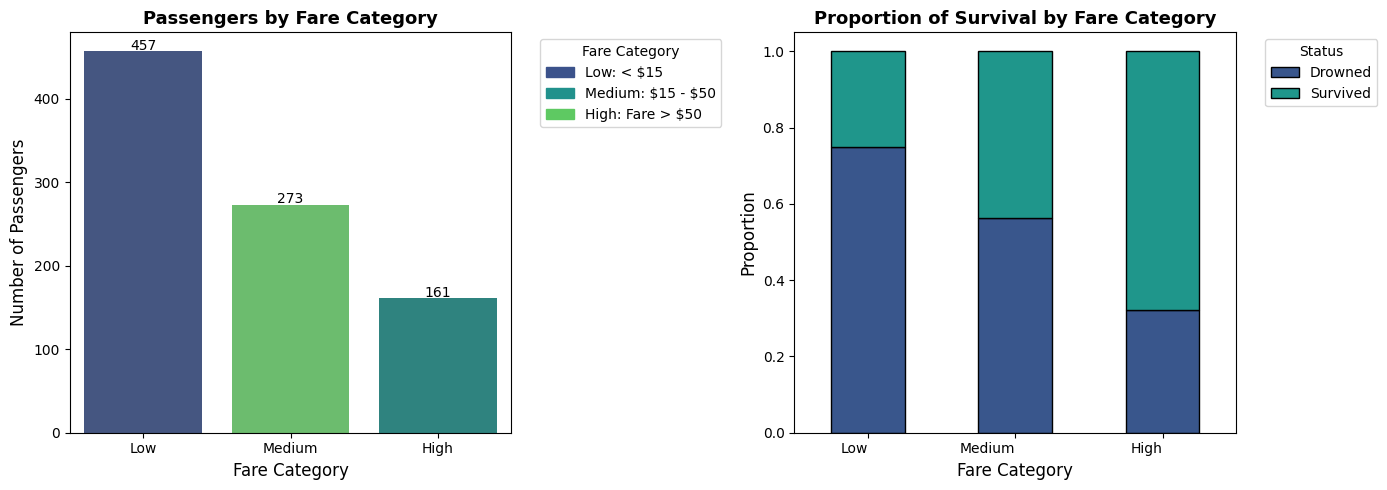

In [159]:
import matplotlib.patches as mpatches
fare_order = ['Low', 'Medium', 'High']

fig = plt.figure(figsize=(14, 5))

# Plot 1: Count Plot for Fare Category
ax1 = fig.add_subplot(121)

# Set a custom palette for the hue categories
palette = sns.color_palette("viridis", n_colors=len(fare_order))
ax = sns.countplot(data=data, x='Fare_Category', ax=ax1, hue='Fare_Category', palette=palette, order=fare_order)

# Add counts on top of bars
labels = data['Fare_Category'].value_counts()
for i, v in enumerate(labels):
    ax.text(i, v + 2, str(v), ha='center', size=10, color='black')

ax.set_title('Passengers by Fare Category', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Passengers', fontsize=12)
ax.set_xlabel('Fare Category', fontsize=12)

description = {
    "Low": "Fare < 15",
    "Medium": "Fare 15 - 50",
    "High": "Fare > 50"
}

# Create the color legend manually for the Fare categories (using colors from the palette)
handles = [
    mpatches.Patch(color=palette[0], label="Low: < $15"),
    mpatches.Patch(color=palette[1], label="Medium: \\$15 - $50"),
    mpatches.Patch(color=palette[2], label="High: Fare > $50")
]

# Add the legend to the figure (positioned next to the first plot)
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', title="Fare Category")


# Plot 2: Proportion of Survival by Fare Category
fare_survival_normalized = data.groupby(['Fare_Category'])['Survived'].value_counts(normalize=True).unstack()
fare_survival_normalized = fare_survival_normalized.loc[fare_order]
# stacked bar plot for survival proportions
ax2 = fig.add_subplot(122)
fare_survival_normalized.plot(
    kind='bar',
    stacked=True,
    color=["#39568cff", "#1f968bff"],
    ax=ax2,
    edgecolor='black'
)

ax2.set_title('Proportion of Survival by Fare Category', fontsize=13, fontweight='bold')
ax2.set_ylabel('Proportion', fontsize=12)
ax2.set_xlabel('Fare Category', fontsize=12)
ax2.legend(['Drowned', 'Survived'], bbox_to_anchor=(1.05, 1), loc='upper left', title='Status')
_ = plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.tight_layout()
plt.show()

In [170]:
# Survival Rate of created Category
fare_survival

Survived,0,1,Survival Rate (%)
Fare_Category,,,
High,52,109,67.701863
Low,343,114,24.945295
Medium,154,119,43.589744
